In [1]:
import matplotlib.pyplot as plt
import json
import math
import numpy as np
import statistics
# from plot_func import fivepl, expfunc
from plot_func import plot_kgw_gamma_1, plot_ts_valid, plot_ts_good_ckpts, plot_synthid_layer_8

colors = ['lightsteelblue','blue', 'purple', 'red']
title = ['Empirical FPR=0.1%', 'Empirical FPR=1%', 'z avg']

In [2]:
params = ['0.1_4.0_400', '0.1_4.5_200', '0.1_5.0_500',\
			  '0.1_5.5_600', '0.1_6.0_400', '0.1_6.5_300']   

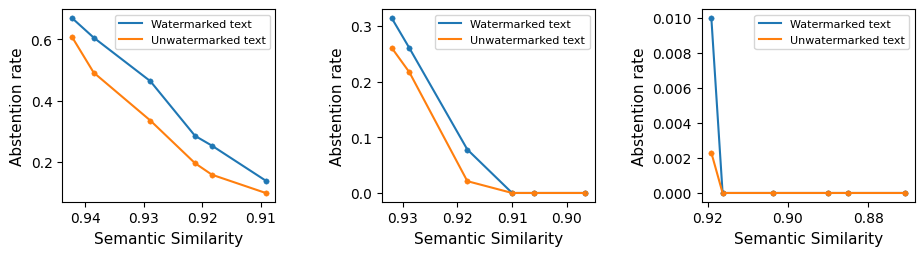

In [3]:
plt_cnt = 3
if plt_cnt == 3:
    fig, ax = plt.subplots(1,3, figsize=(11, 2.5))
elif plt_cnt == 2:
    fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))
gen_len = [50,100,200]
labels = ["Watermarked text", "Unwatermarked text"]
for ax_id in range(len(ax)):
    abs_rate_wm_list, abs_rate_no_wm_list = [], []
    s = []
    for param in params:
        z_scores_no_wm = json.load(open(f"FPR/MedMark/len_{gen_len[ax_id]}/gumbel_{param}/detail.json"))[0]

        bound_pos = np.percentile(z_scores_no_wm, 99)

        file_name = f"HealthSearchQA/gen_seed_42/key0/MedMark/len_{gen_len[ax_id]}_temp_1.0/test/text/gumbel_{param}_mistral.json_pp"
        with open(file_name, "r") as f:
            entrys = [json.loads(x) for x in f.read().strip().split("\n")]
            s.append(statistics.mean([entry['STS'] for entry in entrys]))
            z_scores_wm = [entry['z_wm'] for entry in entrys]

        bound_neg = np.percentile(z_scores_wm, 5)

        abs_rate_wm = sum([1 for val in z_scores_wm if val >= bound_neg and val <= bound_pos]) / len(z_scores_wm)
        abs_rate_no_wm = sum([1 for val in z_scores_no_wm if val >= bound_neg and val <= bound_pos]) / len(z_scores_no_wm)

        abs_rate_wm_list.append(abs_rate_wm)
        abs_rate_no_wm_list.append(abs_rate_no_wm)
    
    x_list = [s, s]
    y_list = [abs_rate_wm_list, abs_rate_no_wm_list]
    for i in range(2):
        ax[ax_id].scatter(x_list[i], y_list[i], s=15, linewidths=0.3)
        ax[ax_id].plot(x_list[i], y_list[i], label=labels[i]) 
        ax[ax_id].legend(loc="upper right", fontsize=8) 

    ax[ax_id].invert_xaxis()
    ax[ax_id].set_ylabel('Abstention rate', fontsize=11)
    ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)

plt.subplots_adjust(wspace=0.5)  
plt.subplots_adjust(hspace=0.5) 
plt.savefig(f"figures/abstention.png", bbox_inches='tight', dpi=300)

In [4]:
# import torch
# from transformers import AutoModelForCausalLM, AutoModel, AutoTokenizer
# from transformers import LlamaForCausalLM, AwqConfig

# gen_len = 50
# device = 'cuda:1'
# model_path = "/data2/mingjia/Mistral-7B-Instruct-v0.2"

# model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=torch.float16).to(device)
# embed_matrix = model.get_input_embeddings().weight    
# tokenizer = AutoTokenizer.from_pretrained(model_path, padding_side="left")
# tokenizer.pad_token_id = tokenizer.eos_token_id
# model.generation_config.pad_token_id = tokenizer.pad_token_id

# model.eval()
# for name, param in model.named_parameters():
#     param.requires_grad = False


In [5]:
# import json
# import math, statistics

# kgw_params = [7.0] #[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
# synthid_params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
# for param in synthid_params:
#     num_leaves, layer = param
#     # file_name = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_1.0/test/text/gumbel_{param}_mistral.json_pp"
#     file_name = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_1.0/test/text/num_leaves_{num_leaves}_layer_{layer}_mistral.json_pp"
#     with open(file_name, "r") as f:
#         entrys = [json.loads(x) for x in f.read().strip().split("\n")]
#         wm_gens = [entry['prefix']+entry['gen_completion'] for entry in entrys]

#     ppl_list = []
#     for i in range(0, 500, 20):
#         input_ids = tokenizer(wm_gens[i:(i+20)], return_tensors='pt', padding=True).to(device)['input_ids'].to(device)
#         prefix_len = input_ids.shape[1] - gen_len
#         tokd_labels = input_ids.clone().detach()
#         attention_masks = (input_ids != tokenizer.pad_token_id).long().to(device)
#         tokd_labels[:,:prefix_len+1] = -100 

#         with torch.no_grad():
#             output = model(input_ids, attention_mask=attention_masks, labels=tokd_labels).loss
#             ppl_list.append(torch.mean(output).item())

#     avg_ppl = statistics.mean(ppl_list)

#     original_file = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_1.0/test/num_leaves_{num_leaves}_layer_{layer}_mistral.json"
#     with open(original_file, "r") as f:
#         data = json.load(f)

#     data["avg_loss"] = avg_ppl
#     with open(original_file, "w") as f:
#         json.dump(data, f, indent=2)
#     print(f"[{param}] Avg PPL: {avg_ppl} → written to {original_file}")

In [6]:
import matplotlib.pyplot as plt
import json
import math
import numpy as np
import statistics
from plot_func import fivepl
from plot_func import plot_kgw_gamma_1, plot_ts_good_ckpts, plot_synthid_layer_8

colors = ['lightsteelblue','blue', 'purple', 'red']
title = ['Empirical FPR=0.1%', 'Empirical FPR=1%', 'z avg']

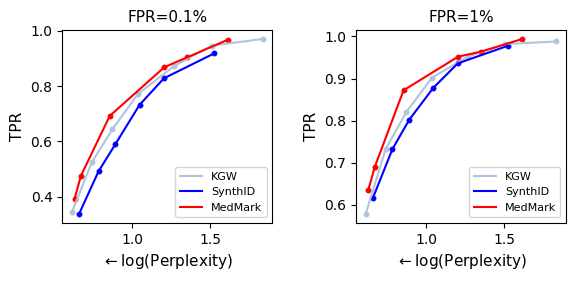

In [7]:
plt_cnt = 2
fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))

length = 100
split = 'test'
model_name = 'mistral'
temp = 1.0
gen_seed=42

kgw_delta = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]

kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]

gen_params = dict(key_id=0, temp=temp, length=length, split=split, model_name=model_name, gen_seed=gen_seed, cross=False, semantic='ppl')

plot_kgw_gamma_1(ax, kgw_delta, plot_curve=True, **gen_params)

params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
plot_synthid_layer_8(ax, params, plot_curve=True, **gen_params)

ckpt_lists = ['gumbel_0.1_4.0/3e-4_100/400', 'gumbel_0.1_4.5/1e-3_100/200', 'gumbel_0.1_5.0/2e-3_100/500',\
			  'gumbel_0.1_5.5/2.5e-3_100/600', 'gumbel_0.1_6.0/2.5e-3_100/400', 'gumbel_0.1_6.5/2.5e-3_100/300']   
plot_ts_good_ckpts(ax, ckpt_lists, plot_curve=True, **gen_params)


plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
plt.savefig(f"figures/perplexity.png", bbox_inches='tight', dpi=300)


In [8]:
# import json
# import math
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from collections import Counter

# def word_entropy(text):
#     words = text.split()
#     counter = Counter(words)
#     total = len(words)
#     entropy = 0
#     for count in counter.values():
#         p = count / total
#         entropy -= p * math.log2(p)
#     return entropy

# temp = 1.0

# ts_params = ['0.1_4.0_400', '0.1_4.5_200', '0.1_5.0_500',\
# 			  '0.1_5.5_600', '0.1_6.0_400', '0.1_6.5_300']   
# for param in ts_params:
#     file_name = f"HealthSearchQA/gen_seed_42/key0/MedMark/len_100_temp_{temp}/test/text/gumbel_{param}_mistral.json_pp"

# # kgw_params = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
# # for param in kgw_params:
# #     file_name = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_{temp}/test/text/mistral_0.1_{param}.json_pp"

# # synthid_params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
# # for param in synthid_params:
# #     num_leaves, layer = param
# #     file_name = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_{temp}/test/text/num_leaves_{num_leaves}_layer_{layer}_mistral.json_pp"
    
#     with open(file_name, "r") as f:
#         entrys = [json.loads(x) for x in f.read().strip().split("\n")]
#         wm_gens = [entry['gen_completion'] for entry in entrys]
#         # wm_gens = [entry['no_wm_completion'] for entry in entrys]

#     avg_entropy = word_entropy(' '.join(wm_gens))

#     if type(param) == str:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/MedMark/len_100_temp_{temp}/test/gumbel_{param}_mistral.json"
#     elif type(param) == list:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_{temp}/test/num_leaves_{num_leaves}_layer_{layer}_mistral.json"
#     elif type(param) == float:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_{temp}/test/mistral_0.1_{param}.json"
    
#     with open(original_file, "r") as f:
#         data = json.load(f)

#     data["avg_entropy"] = avg_entropy
    
#     with open(original_file, "w") as f:
#         json.dump(data, f, indent=2)
#     print(f"[{param}] Avg Entropy: {avg_entropy} → written to {original_file}")

In [9]:
# # diversity given same prompt diff seeds.

# import json
# import math, statistics
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from tqdm import tqdm

# # ts_params = ['0.1_4.0_400', '0.1_4.5_200', '0.1_5.0_500',\
# # 			  '0.1_5.5_600', '0.1_6.0_400', '0.1_6.5_300']   
# # for param in ts_params:
# #     file_name_42 = f"HealthSearchQA/gen_seed_42/key0/MedMark/len_100_temp_1.0/test/text/gumbel_{param}_mistral.json_pp"
# #     file_name_37 = f"HealthSearchQA/gen_seed_37/key0/MedMark/len_100_temp_1.0/test/text/gumbel_{param}_mistral.json_pp"

# kgw_params = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
# for param in kgw_params:
#     file_name_42 = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_1.0/test/text/mistral_0.1_{param}.json_pp"
#     file_name_37 = f"HealthSearchQA/gen_seed_37/key0/KGW/len_100_temp_1.0/test/text/mistral_0.1_{param}.json_pp"

# # synthid_params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
# # for param in synthid_params:
# #     num_leaves, layer = param
# #     file_name = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_1.0/test/text/num_leaves_{num_leaves}_layer_{layer}_mistral.json_pp"
    
#     with open(file_name_42, "r") as f:
#         entrys = [json.loads(x) for x in f.read().strip().split("\n")]
#         wm_gens_42 = [entry['no_wm_completion'] for entry in entrys]
    
#     with open(file_name_37, "r") as f:
#         entrys = [json.loads(x) for x in f.read().strip().split("\n")]
#         wm_gens_37 = [entry['no_wm_completion'] for entry in entrys]

#     smooth = SmoothingFunction().method1
#     self_bleu_scores = []
#     for i in tqdm(range(500)):
#         references = [wm_gens_37[i].split()]  # list of tokenized refs
#         candidate = wm_gens_42[i].split()
#         score = sentence_bleu(references, candidate, smoothing_function=smooth)
#         self_bleu_scores.append(score)

#     avg_diversity = statistics.mean(self_bleu_scores)

#     if type(param) == str:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/MedMark/len_100_temp_1.0/test/gumbel_{param}_mistral.json"
#     elif type(param) == list:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/SynthID/len_100_temp_1.0/test/num_leaves_{num_leaves}_layer_{layer}_mistral.json"
#     elif type(param) == float:
#         original_file = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_1.0/test/mistral_0.1_{param}.json"
    
#     with open(original_file, "r") as f:
#         data = json.load(f)

#     data["avg_diversity"] = avg_diversity
#     print(avg_diversity)
#     break
#     with open(original_file, "w") as f:
#         json.dump(data, f, indent=2)
#     print(f"[{param}] Avg Diversity: {avg_diversity} → written to {original_file}")

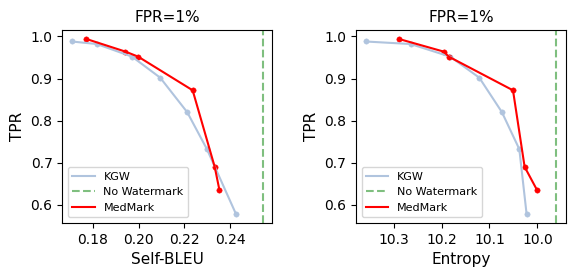

In [10]:
settings = [
    [100, 1.0, False],
]

for length, temp, seperate in settings:
    plt_cnt = 2
    fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))

    split = 'test'
    model_name = 'mistral'
    gen_seed=42

    if length == 100:
        kgw_delta = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
        if model_name == 'mistral':
            kgw_delta = kgw_delta[1:] + [7.0]
    elif length == 50:
        kgw_delta = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
    elif length == 200:
        kgw_delta = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5] 
    kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]

    gen_params = dict(key_id=0, temp=temp, length=length, split=split, model_name=model_name, gen_seed=gen_seed, diversity=True)

    plot_kgw_gamma_1(ax, kgw_delta, plot_curve=True, **gen_params)

    # if temp != 0.5 or length != 200 or seperate == True:
    #     params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
    #     plot_synthid_layer_8(ax, params, plot_curve=True, **gen_params)

    ckpt_lists = ['gumbel_0.1_4.0/3e-4_100/400', 'gumbel_0.1_4.5/1e-3_100/200', 'gumbel_0.1_5.0/2e-3_100/500',\
                'gumbel_0.1_5.5/2.5e-3_100/600', 'gumbel_0.1_6.0/2.5e-3_100/400', 'gumbel_0.1_6.5/2.5e-3_100/300']   
    plot_ts_good_ckpts(ax, ckpt_lists, plot_curve=True, **gen_params)


    plt.subplots_adjust(wspace=0.4)  
    plt.subplots_adjust(hspace=0.4) 
    plt.savefig(f"figures/diversity.png", bbox_inches='tight', dpi=300)